# Dealing with Imbalanced Data

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. 

We'll look at a few possible ways to handle imbalanced class problem using credit card data. We want to correctly classify the minority class of fraudulent transactions.

### Import Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [85]:
df = pd.read_csv('creditcard.csv')

In [86]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [87]:
print(df.shape)

(284807, 31)


In [88]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


[Text(0, 0, 'Not Fraud'), Text(0, 0, 'Fraud')]

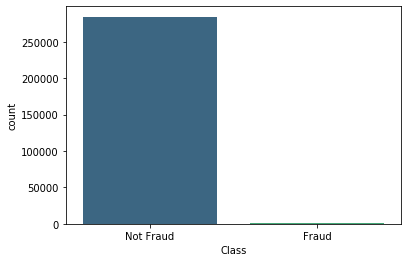

In [89]:
fig, ax = plt.subplots()
g = sns.countplot(df.Class,palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])

In [90]:
(len(df.loc[df.Class==1])) / (len(df.loc[df.Class == 0])) * 100

0.17304750013189596

From the plot above we can see how skewed the distributions are. Our target class accounts for only 0.17% of our dataset. This dataset is highly imbalanced with something like 99.8% of the transactions being not fraudulent. 
We should look at the confusion matrix and see how many of the fraudulent transactions we are actually able to identify.

### Create Train and Test Sets

In [91]:
X = df.drop('Class', axis = 1)
y = df.Class

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [93]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

In [94]:
accuracy_score(y_test, lr_prediction)

0.9988828242203709

In [95]:
predictions = pd.DataFrame(lr_prediction)
predictions[0].value_counts()

0    93869
1      118
Name: 0, dtype: int64

Using Logistic Regression, we can predict that there are 118 instances of class 1. This is good but can we do better?

### 1. Change the performance metric

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading. Metrics that can provide better insight include:

Confusion Matrix: a table showing correct predictions and types of incorrect predictions.

Precision: the number of true positives divided by all positive predictions. 
Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.

Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.

F1: Score: the weighted average of precision and recall.
Since our main objective with the dataset is to prioritize accuraltely classifying fraud cases the recall score can be considered our main metric to use for evaluating outcomes.

In [96]:
# f1 score

f1_score(y_test, lr_prediction)

0.6181818181818182

In [97]:
#confusion matrix

pd.DataFrame(confusion_matrix(y_test, lr_prediction))

,0,1
0,93797,33
1,72,85


In [98]:
recall_score(y_test, lr_prediction)

0.5414012738853503

We have a very high accuracy score of 0.998 but a F1 score of only 0.618. And from the confusion matrix, we can see we are misclassifying several observations leading to a recall score of only 0.54.

### 2. Change the algorithm

It is always a good idea to try a variety of algorithims when dealing with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierachy of if/else questions. This can force both classes to be addressed.

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# train model

rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set

rfc_prediction = rfc.predict(X_test)

accuracy_score(y_test, rfc_prediction)

0.999521210380159

In [101]:
#f1 score

f1_score(y_test, rfc_prediction)

0.8398576512455517

In [102]:
#confusion matrix

pd.DataFrame(confusion_matrix(y_test, rfc_prediction))

,0,1
0,93824,6
1,39,118


In [103]:
#recall score

recall_score(y_test, rfc_prediction)

0.7515923566878981

## Resampling Techniques

### 3. Oversampling Minority Class

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A possible drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

It is important we always split into test and train sets before any resampling techniques. Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! Our model will then simply memorise specific data points and cause overfitting

In [104]:
from sklearn.utils import resample

In [105]:
# Separate input features and target

X = df.drop('Class', axis=1)
y = df.Class

In [106]:
# Setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [107]:
# Concatenate our training data back together

X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50093,44343.0,-0.512045,0.903785,1.564528,1.400223,0.037308,-0.182233,0.552689,0.122513,-0.231995,...,-0.007402,0.279788,-0.068434,0.408627,-0.144738,-0.242263,0.420430,0.208938,17.34,0
198744,132631.0,-1.013748,-0.296800,1.672464,-0.157600,-0.005596,0.183444,0.378501,-0.605630,0.679077,...,-0.016647,0.715653,-0.658018,0.822073,0.013633,1.168677,-0.460515,-0.337174,139.40,0
35358,38085.0,-5.278534,2.184014,-1.870685,-2.642741,-3.416694,1.361060,-3.969136,4.375162,-3.116073,...,0.501476,0.599292,0.067674,-1.366679,0.306418,-0.098684,-1.346567,-0.399267,25.00,0
174063,121750.0,2.019981,-0.889599,-1.076011,-0.626016,0.041409,1.068362,-0.839940,0.250268,-0.327486,...,-0.166844,0.275689,0.316024,-0.307216,-0.413173,0.754892,0.015831,-0.058720,13.00,0
181587,125037.0,0.448903,-0.175230,0.606674,-1.876915,0.012498,-0.370099,0.287547,-0.316988,-0.688054,...,0.221677,0.791562,-0.047682,0.698088,-0.311208,-0.312486,-0.132074,-0.214401,25.00,0


In [108]:
# separate minority and majority classes

not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [109]:
# upsample minority

fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results


In [110]:
# combine majority and upsampled minority

upsampled = pd.concat([not_fraud, fraud_upsampled])


In [111]:
# check new class counts

upsampled.Class.value_counts()

1    190485
0    190485
Name: Class, dtype: int64

In [112]:
# trying logistic regression again with the balanced dataset

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

In [113]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [114]:
upsampled_pred = upsampled.predict(X_test)

In [115]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9766882653984061

In [116]:
# f1 score
f1_score(y_test, upsampled_pred)

0.11403154063890011

In [117]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,91655,2175
1,16,141


In [118]:
recall_score(y_test, upsampled_pred)

0.8980891719745223

Our accuracy score decreased after upsampling, but the model is now predicting both classes more equally, making it an improvement over our plain logistic regression above.

### 4. Undersampling Majority Class

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class

In [119]:
# still using our separated classes fraud and not_fraud from above

# downsample majority

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority

downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts

downsampled.Class.value_counts()

1    335
0    335
Name: Class, dtype: int64

In [120]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [121]:
# Checking accuracy

accuracy_score(y_test, undersampled_pred)

0.9703788821858342

In [122]:
# f1 score

f1_score(y_test, undersampled_pred)

0.09197651663405089

In [123]:
# confusion matrix

pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,91062,2768
1,16,141


In [124]:
recall_score(y_test, undersampled_pred)

0.8980891719745223

Undersampling produced a higher recall score than oversampling. It is worth noting, however, that we used a small number of total samples in training the model.

## Conclusion

We have covered a few methods for dealing with imbalanced datasets:

1. Change the performance metric
2. Change the algorithim
3. Oversampling the minority class
4. Undersampling the majority class


These are just some of the many possible methods to try when dealing with imbalanced datasets, and not an exhaustive list. Some others methods to consider are collecting more data or choosing different resampling ratios - you don't have to have exactly a 1:1 ratio! You should always try several approaches and then decide which is best for your problem.